# Investigation of envelope of time spectra if only a small number of scattering events takes place

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1, factorial


In the low-excitatio the regime, the electric field behind a sample with effective thickness $b$ is given by
\begin{align}
   E(t)  =& \delta(t) - \sqrt{\frac{b}{t}}J_1\left(2\sqrt{bt}\right)e^{-i\omega_0 t} e^{-\gamma t}\theta(t) \, \\
           =& \delta(t) - b \frac{J_1\left(2\sqrt{bt}\right)}{\sqrt{bt}}e^{-i\omega_0 t} e^{-\gamma t}\theta(t) \, \\
           =& \delta(t) - be^{-i\omega_0 t} e^{-\gamma t}\theta(t) \cdot \sum_{n=0}^\infty \frac{(-1)^n}{n!\,(n+1)!} \,(b t)^n.
\end{align}
In the last row we have Taylor expanded the Bessel function and the powers of $n$ can be interpreted as the number of scattering event staking place.

# Demonstrate convergence

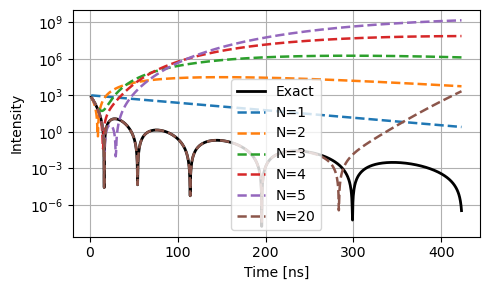

In [52]:
# Parameters
b = 32.0        # effective thickness parameter b=d[um]*4
gamma = 1     # decay rate
omega0 = 0.0    # carrier frequency (set 0 to avoid oscillations for clarity)
t = np.linspace(0.01, 3, 1000)  # avoid t=0 because of sqrt(t) singularity

# Heaviside step function
theta = np.heaviside(t, 1.0)

# --- Exact expression using Bessel form ---
E_exact = -np.sqrt(b/t) * j1(2*np.sqrt(b*t)) * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta
I_exact = np.abs(E_exact)**2

# --- Series expansion truncated at N terms ---
def E_series(t, b, gamma, omega0, N):
    S = np.zeros_like(t, dtype=np.complex128)
    for n in range(N):
        S += ((-1)**n / (factorial(n)*factorial(n+1))) * (b*t)**n
    return -b * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta * S

# Truncation levels to compare
trunc_levels = [5, 10, 20, 40]
trunc_levels = [1,2,3,4,5, 20]

# --- Plot ---
plt.figure(figsize=(5,3))
plt.plot(t*141, I_exact, 'k', lw=2, label="Exact")
for N_trunc in trunc_levels:
    E_trunc = E_series(t, b, gamma, omega0, N_trunc)
    I_trunc = np.abs(E_trunc)**2
    plt.plot(t*141, I_trunc, '--', lw=1.8, label=f"N={N_trunc}")

# --- Plot ---
plt.xlabel("Time [ns]")
plt.ylabel(r"Intensity")
#plt.title("NFS Intensity: Exact vs Series Expansion")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Convergence_of_responseFunction.pdf")
plt.show()


# Investigate ratio to full response

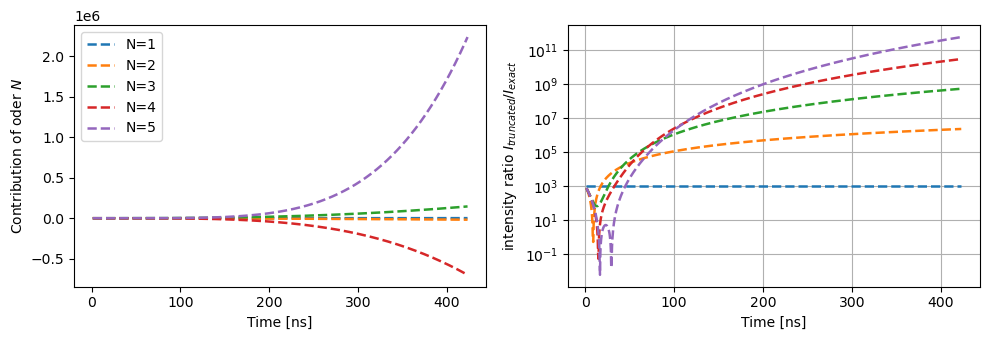

In [49]:
# Parameters
b1 = 8*4  # for truncated    # effective thickness parameter b=d[um]*4
b2 = 4      # for exact
gamma = 0.1     # decay rate
omega0 = 0.0    # carrier frequency (set 0 to avoid oscillations for clarity)
t = np.linspace(0.01, 3, 1000)  # avoid t=0 because of sqrt(t) singularity

# Heaviside step function
theta = np.heaviside(t, 1.0)

# --- Exact expression using Bessel form ---
E_exact = -np.sqrt(b2/t) * j1(2*np.sqrt(b2*t)) * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta
E_exact += -np.sqrt(b1/t) * j1(2*np.sqrt(b1*t)) * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta
E_exact = -np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta
I_exact = np.abs(E_exact)**2

# --- Series expansion truncated at N terms ---
def E_series(t, b, gamma, omega0, N):
    S = np.zeros_like(t, dtype=np.complex128)
    for n in range(N):
        S += ((-1)**n / (factorial(n)*factorial(n+1))) * (b*t)**n
    return -b * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta * S
    
def E_contribution(t, b, gamma, omega0, N):
    S = np.zeros_like(t, dtype=np.complex128)
    for n in [N]:
        S += ((-1)**n / (factorial(n)*factorial(n+1))) * (b*t)**n
    return -b * np.exp(-1j*omega0*t) * np.exp(-gamma*t) * theta * S

# Truncation levels to compare
trunc_levels = [1,2,3,4,5]

# --- Plot ---
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3.5))

#plt.plot(t, I_exact, 'k', lw=2, label="Exact Bessel form")
for N_trunc in trunc_levels:
    E_contribution_res = E_contribution(t, b1, gamma, omega0, N_trunc)
    E_trunc = E_series(t, b1, gamma, omega0, N_trunc)
    I_trunc = np.abs(E_trunc)**2
    ax1.plot(t*141, E_contribution_res, '--', lw=1.8, label=f"N={N_trunc}")
    ax2.plot(t*141, I_trunc/I_exact, '--', lw=1.8, label=f"N={N_trunc}")

# --- Plot ---
ax1.set_xlabel("Time [ns]")
ax1.set_ylabel(r"Contribution of oder $N$")
ax2.set_xlabel("Time [ns]")
ax2.set_ylabel(r"intensity ratio $I_{truncated} / I_{exact}$")
#ax2.set_title("NFS Intensity: Exact vs Series Expansion")
ax2.set_yscale("log")
ax1.legend()
ax2.grid(True)
plt.tight_layout()
plt.savefig("truncatedResponseFunctio.pdf")
plt.show()